In [ ]:
# Empty file Memory: 107.2 MB

In [17]:
# https://towardsdatascience.com/working-with-sparse-data-sets-in-pandas-and-sklearn-d26c1cfbe067
BYTES_TO_MB_DIV = 0.000001
def print_memory_usage_of_data_frame(df):
    mem = round(df.memory_usage().sum() * BYTES_TO_MB_DIV, 3) 
    print("Memory usage is " + str(mem) + " MB")

#  USAGE    
# print_memory_usage_of_data_frame(data)

In [4]:
import math
math.pi

3.141592653589793

In [1]:
# https://en.wikipedia.org/wiki/Earth_radius
# R_avg = 3,959 miles (3950~3963)
# GPS local search subsample
# given local coordinates, and radius, subsample df_places
local = [47.85408756055844, -122.21958066838837] # Alexey's local USPS GPS from google maps
# [latitude North-South, longitude East-West]; opposite order x(EW), y(NS) for geopandas
radius = 5 # miles

import math

def check_gps(gps_list, radius):
    '''
    gps_list = [NS_gps, EW_gps] in decimal degrees (Google map right-click output)
    exampe: [47.85408756055844, -122.21958066838837] - 98012 USPS
    radius - desired radius of interest im miles
    
    https://en.wikipedia.org/wiki/Earth_radius
    R_avg = 3,959 miles (3950~3963)

    gps column in places.gps is in the form ['NS_latitudes','EW_longitudes']
    Valid gps coordinates are NS +- 90.0, EW +- 180.0
    There are incorrect NS 75755 (2.45%), EW 75369 (2.44%) of all data
    let's do square first
    IGNORE (BUG) flip through poles EW at exactly +-90.0, and +- at exactly 180.0
    R_avg = 3959 miles, 1/4 equator-> pole 2*PI*R/4 = 90.0, or 
    PI*R/(180) = 1.0 in NS in miles
    
    Y_miles_NS_one_WAY_in_GPS_degrees = Y * 180/(PI * R_earth)
    
    R_ew = R_earth * cos(PI/180*NS_gps); R_earth at NS_gps = 0, 0 at NS_gps = +- 90.0
    
    X_miles_EW_one_WAY_in_GPS_degrees = X * 180/(PI * R_ew)
    
    import math
    math.pi
    3.141592653589793

    '''
    PI = math.pi  # 3.141592653589793
    R_earth = 3959  # Average Earth radius
    # Not GPS dependent going NS
    Y_miles_NS_one_WAY_in_GPS_degrees = radius * 180/(PI * R_earth)
    # GPS dependent on NS_gps - smaller EW circle
    R_ew = R_earth * math.cos(PI/180*gps_list[0])
    X_miles_EW_one_WAY_in_GPS_degrees = radius * 180/(PI * R_ew)
    
    return Y_miles_NS_one_WAY_in_GPS_degrees, X_miles_EW_one_WAY_in_GPS_degrees
    

In [2]:
Y_NS_deg, X_EW_deg = check_gps([47.85408756055844, -122.21958066838837], 1.0)  # Google map 1.609344 km

In [13]:
whos

Variable    Type         Data/Info
----------------------------------
X_EW_deg    float        0.021567561280927794
Y_NS_deg    float        0.014472285807800536
check_gps   function     <function check_gps at 0x7feab5631320>
df_places   DataFrame                             <...>3114353 rows x 8 columns]
local       list         n=2
math        module       <module 'math' from '/Use<...>h.cpython-37m-darwin.so'>
np          module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd          module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt         module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
radius      int          5
random      module       <module 'random' from '/U<...>lib/python3.7/random.py'>


In [3]:
!ls data

gPlusPlaceId_filter.json places_sub.json          reviews_sub.json
places.json              places_sub_gps.json      users.json
places_gps.json          reviews.json             users_sub.json


In [5]:
import numpy as np
import pandas as pd

In [6]:
%%time
df=pd.read_json('data/places_gps.json')  # Wall time: 48 s

CPU times: user 40 s, sys: 5.37 s, total: 45.3 s
Wall time: 48 s


In [7]:
df.shape  # (3087402, 9)

(3087402, 9)

In [8]:
df.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,33.703804,-117.003209
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,38.979759,-76.547538
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,43.227760,44.762726
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,43.529494,-96.792244
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,-2.976256,104.742662


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3087402 entries, 0 to 3114352
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   name             object 
 1   price            object 
 2   address          object 
 3   hours            object 
 4   phone            object 
 5   closed           bool   
 6   gPlusPlaceId     float64
 7   Y_NS_latitudes   float64
 8   X_EW_longitudes  float64
dtypes: bool(1), float64(3), object(5)
memory usage: 214.9+ MB


In [10]:
# create subsample using current gps, save as subsample db for the model 
# use def 
curr_gps = [47.85408756055844, -122.21958066838837]
radius = 50.0
Y_NS_deg, X_EW_deg = check_gps(curr_gps, radius)  # Google map 1.609344 km
Y_NS_deg, X_EW_deg
# construct a filter based on given GPS +- box
# AND notation as & https://pythoninoffice.com/filter-a-pandas-dataframe-or-and-not/
gps_box = ((df.Y_NS_latitudes < curr_gps[0] + Y_NS_deg) & (df.Y_NS_latitudes > curr_gps[0] - Y_NS_deg)) & \
((df.X_EW_longitudes < curr_gps[1] + X_EW_deg) & (df.X_EW_longitudes > curr_gps[1] - X_EW_deg))

array([[<AxesSubplot:title={'center':'Y_NS_latitudes'}>,
        <AxesSubplot:title={'center':'X_EW_longitudes'}>]], dtype=object)

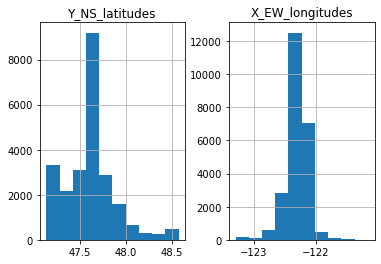

In [20]:
df[['Y_NS_latitudes','X_EW_longitudes']].loc[gps_box].hist()
# df[gps_box].Y_NS_latitudes.hist()

In [21]:
gPlusPlaceId_filter = df[gps_box].gPlusPlaceId.to_frame()
gPlusPlaceId_filter.head()

,gPlusPlaceId
114,1.171118e+20
188,1.077787e+20
197,1.026709e+20
462,1.159807e+20
742,1.066260e+20


In [29]:
df[gps_box].gPlusPlaceId.iloc[1].astype(int)

-9223372036854775808

In [22]:
!ls data

gPlusPlaceId_filter.json places_sub.json          reviews_sub.json
places.json              places_sub_gps.json      users.json
places_gps.json          reviews.json             users_sub.json


In [23]:
gPlusPlaceId_filter.to_json('data/gPlusPlaceId_filter.json')

In [22]:
# gps = pd.DataFrame(df.gps.dropna().to_list(), columns = ['NS_latitudes','EW_longitudes']) #.str.split(',', expand=True)
gps = pd.DataFrame(df_places.gps.dropna().to_list(), columns = ['NS_latitudes','EW_longitudes']) #.str.split(',', expand=True)
gps.head()

,NS_latitudes,EW_longitudes
0,33.703804,-117.003209
1,38.979759,-76.547538
2,43.227760,44.762726
3,43.529494,-96.792244
4,-2.976256,104.742662


In [28]:
gps.index

RangeIndex(start=0, stop=3087402, step=1)

In [46]:
df_places['NS_gps_latitudes']=np.nan
df_places['NS_gps_latitudes'].loc[gps.index] = gps.NS_latitudes.values

/Users/alexey_imac/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [47]:
df_places['EW_gps_longitudes']=np.nan
df_places['EW_gps_longitudes'].loc[gps.index] = gps.EW_longitudes.values

In [50]:
# df_places.drop(columns=['NS_gps_latitudes', 'EW_gps_latitudes', 'EW_gps_longitudes'], inplace=True)
# df_places.drop(columns=['EW_gps_latitudes'])
df_places.drop(columns=['NS_gps_latitudes', 'EW_gps_longitudes'], inplace=True)





In [55]:
gps.NS_latitudes.values

array([33.703804, 38.979759, 43.22776 , ..., 21.04402 , 34.161776,
        9.111594])

In [59]:
df_places.merge(gps, left_index=True, right_index=True)  #3087402 rows × 10 columns

,name,price,address,hours,phone,closed,gPlusPlaceId,gps,NS_latitudes,EW_longitudes
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,"[33.703804, -117.003209]",33.703804,-117.003209
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,"[38.979759, -76.547538]",38.979759,-76.547538
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,"[43.22776, 44.762726]",43.227760,44.762726
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,"[43.529494, -96.792244]",43.529494,-96.792244
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,"[-2.976256, 104.742662]",-2.976256,104.742662
...,...,...,...,...,...,...,...,...,...,...
3087397,Caldian Hair Salon,None,"[4633 N Kedzie Ave, Chicago, IL 60625]",None,(773) 539-1002,False,1.165809e+20,"[41.965734, -87.708245]",25.018466,121.533798
3087398,DND Public Convenience,None,"[Noida Toll Bridge, New Delhi, DL, India]",None,None,False,1.052226e+20,"[28.575596, 77.283218]",38.175749,12.735448
3087399,Johnny Ray's Sultry Soul Food,None,"[1141 Elden St, Herndon, VA 20170]","[[Monday, [['11:00 am--9:00 pm']]], [Tuesday, ...",(703) 657-2772,False,1.078538e+20,"[38.964104, -77.397135]",21.044020,75.802731
3087400,Denver Tire & Auto,None,"[3309 N Hwy 16, Maiden, NC 28650]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(704) 483-5111,False,1.088066e+20,"[35.525826, -81.016541]",34.161776,-118.054231


In [97]:
df_places.gps.dropna()
filtered_df = df_places[df_places['gps'].notnull()]
filtered_df.head()


,name,price,address,hours,phone,closed,gPlusPlaceId,gps
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,"[33.703804, -117.003209]"
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,"[38.979759, -76.547538]"
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,"[43.22776, 44.762726]"
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,"[43.529494, -96.792244]"
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,"[-2.976256, 104.742662]"


In [104]:
filtered_df = filtered_df.reindex(index=gps.index)

In [105]:
filtered_df.index

RangeIndex(start=0, stop=3087402, step=1)

In [106]:
gps.index

RangeIndex(start=0, stop=3087402, step=1)

In [91]:
filtered_df.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,gps
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,"[33.703804, -117.003209]"
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,"[38.979759, -76.547538]"
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,"[43.22776, 44.762726]"
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,"[43.529494, -96.792244]"
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,"[-2.976256, 104.742662]"


In [108]:
filtered_df.merge(gps, left_index=True, right_index=True)

,name,price,address,hours,phone,closed,gPlusPlaceId,gps,NS_latitudes,EW_longitudes
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,"[33.703804, -117.003209]",33.703804,-117.003209
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,"[38.979759, -76.547538]",38.979759,-76.547538
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,"[43.22776, 44.762726]",43.227760,44.762726
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,"[43.529494, -96.792244]",43.529494,-96.792244
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,"[-2.976256, 104.742662]",-2.976256,104.742662
...,...,...,...,...,...,...,...,...,...,...
3087397,Caldian Hair Salon,None,"[4633 N Kedzie Ave, Chicago, IL 60625]",None,(773) 539-1002,False,1.165809e+20,"[41.965734, -87.708245]",25.018466,121.533798
3087398,DND Public Convenience,None,"[Noida Toll Bridge, New Delhi, DL, India]",None,None,False,1.052226e+20,"[28.575596, 77.283218]",38.175749,12.735448
3087399,Johnny Ray's Sultry Soul Food,None,"[1141 Elden St, Herndon, VA 20170]","[[Monday, [['11:00 am--9:00 pm']]], [Tuesday, ...",(703) 657-2772,False,1.078538e+20,"[38.964104, -77.397135]",21.044020,75.802731
3087400,Denver Tire & Auto,None,"[3309 N Hwy 16, Maiden, NC 28650]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(704) 483-5111,False,1.088066e+20,"[35.525826, -81.016541]",34.161776,-118.054231


In [109]:
gps.loc[3087401]

NS_latitudes      9.111594
EW_longitudes   -81.846310
Name: 3087401, dtype: float64

In [202]:
%%time
df = pd.read_json('data/places.json')  # Wall time: 1min

CPU times: user 56.5 s, sys: 1min 46s, total: 2min 42s
Wall time: 3min 43s


In [203]:
tmp=pd.DataFrame({'a':[1,2,3], 'b':[3,4,5]})
tmp.head()

,a,b
0,1,3
1,2,4
2,3,5


In [204]:
filter=tmp.a>1
filter

0    False
1     True
2     True
Name: a, dtype: bool

In [210]:
tmp['a'][filter]

1    2
2    3
Name: a, dtype: int64

In [211]:
tmp['a'][filter] = tmp['a'][filter]*2
tmp.head()

,a,b
0,1,3
1,4,4
2,6,5


In [212]:
whos

Variable                           Type            Data/Info
------------------------------------------------------------
BYTES_TO_MB_DIV                    float           1e-06
X_EW_deg                           float           0.021567561280927794
Y_NS_deg                           float           0.014472285807800536
box                                dict            n=3
check_gps                          function        <function check_gps at 0x7feab5631320>
counter                            int             6
countries                          GeoDataFrame           pop_est      conti<...>n\n[177 rows x 6 columns]
df                                 DataFrame                                <...>3114353 rows x 8 columns]
df_index                           Series          0                0\n1    <...>th: 3087402, dtype: int64
df_places                          DataFrame                                <...>3114353 rows x 8 columns]
filter                             Series          

In [213]:
df.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,gps
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,"[33.703804, -117.003209]"
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,"[38.979759, -76.547538]"
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,"[43.22776, 44.762726]"
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,"[43.529494, -96.792244]"
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,"[-2.976256, 104.742662]"


In [118]:
df.shape # Initial Read (3114353, 8)

(3114353, 8)

In [214]:
%%time
df = df[df['gps'].notna()] # Wall time: 566 ms
df.shape # (3087402, 8)  dropped 26951 or 0.86%

CPU times: user 388 ms, sys: 16.3 ms, total: 404 ms
Wall time: 410 ms


(3087402, 8)

In [215]:
df_index = pd.Series(df.index)  # Int64Index, last index value 3114352, total len 3087402 (gaps from 26951)

In [216]:
df_index.index # index of this series is RangeIndex(start=0, stop=3087402, step=1), values are with gaps

RangeIndex(start=0, stop=3087402, step=1)

In [145]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            3114343, 3114344, 3114345, 3114346, 3114347, 3114348, 3114349,
            3114350, 3114351, 3114352],
           dtype='int64', length=3087402)

In [217]:
gps = pd.DataFrame(df.gps.dropna().to_list(), columns = ['Y_NS_latitudes','X_EW_longitudes']) #.str.split(',', expand=True)
gps.shape # (3087402, 2)

(3087402, 2)

In [218]:
gps.index  # RangeIndex(start=0, stop=3087402, step=1
# Length mismatch: Expected 3087402 rows, received array of length 3060689
gps = gps.set_index(pd.Series(df.index))  # same index with gaps from original
gps.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            3114343, 3114344, 3114345, 3114346, 3114347, 3114348, 3114349,
            3114350, 3114351, 3114352],
           dtype='int64', length=3087402)

In [219]:
df=df.merge(gps, left_index=True, right_index=True)
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            3114343, 3114344, 3114345, 3114346, 3114347, 3114348, 3114349,
            3114350, 3114351, 3114352],
           dtype='int64', length=3087402)

In [220]:
df.shape

(3087402, 10)

In [221]:
df.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,gps,Y_NS_latitudes,X_EW_longitudes
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,"[33.703804, -117.003209]",33.703804,-117.003209
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,"[38.979759, -76.547538]",38.979759,-76.547538
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,"[43.22776, 44.762726]",43.227760,44.762726
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,"[43.529494, -96.792244]",43.529494,-96.792244
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,"[-2.976256, 104.742662]",-2.976256,104.742662


In [222]:
df.loc[3114352]

name                  Escuela Pueblo Nuevo
price                                 None
address                           [Panama]
hours                                 None
phone                                 None
closed                               False
gPlusPlaceId       114679857037403815936.0
gps                  [9.111594, -81.84631]
Y_NS_latitudes                    9.111594
X_EW_longitudes                  -81.84631
Name: 3114352, dtype: object

In [223]:
filter_BAD_gps = (df.Y_NS_latitudes.abs() > 90.0) | (df.X_EW_longitudes.abs() > 180.0)
filter_BAD_gps.sum()  # (75818)/3087402*100 2.46%

75818

In [224]:
df['Y_NS_latitudes'][filter_BAD_gps].head()

87    -33879362.0
112    25680978.0
142    40099340.0
187    40267971.0
270    48554842.0
Name: Y_NS_latitudes, dtype: float64

In [225]:
df['Y_NS_latitudes'][filter_BAD_gps] = df['Y_NS_latitudes'][filter_BAD_gps] / 1e6
df['Y_NS_latitudes'][filter_BAD_gps]

/Users/alexey_imac/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


87        -33.879362
112        25.680978
142        40.099340
187        40.267971
270        48.554842
             ...    
3114142    25.024374
3114184    23.172940
3114280    34.361762
3114323    46.088796
3114340     0.000338
Name: Y_NS_latitudes, Length: 75818, dtype: float64

In [193]:
df.loc[filter_BAD_gps, :].Y_NS_latitudes = df.loc[filter_BAD_gps].Y_NS_latitudes / 1e6
df.loc[filter_BAD_gps, :].Y_NS_latitudes
# tmp.head()
# tmp.shape # (75818, 10)
# -33.83162529277344, 151.2045682501348 Sidney Australia [-33879362.0, 151203531.0]

87        -3.387936e+07
112        2.568098e+07
142        4.009934e+07
187        4.026797e+07
270        4.855484e+07
               ...     
3114142    2.502437e+07
3114184    2.317294e+07
3114280    3.436176e+07
3114323    4.608880e+07
3114340    3.381868e+02
Name: Y_NS_latitudes, Length: 75818, dtype: float64

In [197]:
tmp.index

Int64Index([     87,     112,     142,     187,     270,     383,     424,
                451,     542,     566,
            ...
            3114050, 3114063, 3114082, 3114099, 3114132, 3114142, 3114184,
            3114280, 3114323, 3114340],
           dtype='int64', length=75818)

In [196]:
tmp = df.Y_NS_latitudes[filter_BAD_gps] / 1e6
df.Y_NS_latitudes[filter_BAD_gps] = tmp
df.Y_NS_latitudes[filter_BAD_gps]

/Users/alexey_imac/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


87        -3.387936e-05
112        2.568098e-05
142        4.009934e-05
187        4.026797e-05
270        4.855484e-05
               ...     
3114142    2.502437e-05
3114184    2.317294e-05
3114280    3.436176e-05
3114323    4.608880e-05
3114340    3.381868e-10
Name: Y_NS_latitudes, Length: 75818, dtype: float64

In [200]:
df.loc[filter_BAD_gps].Y_NS_latitudes.max(), df.loc[filter_BAD_gps].Y_NS_latitudes.min()

(6.977584699999999e-05, -5.4806068e-05)

In [226]:
df['X_EW_longitudes'][filter_BAD_gps] = df['X_EW_longitudes'][filter_BAD_gps] / 1e6
df['X_EW_longitudes'][filter_BAD_gps]

/Users/alexey_imac/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


87         151.203531
112       -100.439954
142         -7.466653
187        -75.919631
270        -88.873850
              ...    
3114142    121.478163
3114184     88.579839
3114280    -84.033909
3114323    -88.635225
3114340     -0.000787
Name: X_EW_longitudes, Length: 75818, dtype: float64

In [201]:
df.loc[filter_BAD_gps].X_EW_longitudes.max(), df.loc[filter_BAD_gps].X_EW_longitudes.min()

(178054936.0, -159601736.0)

In [198]:
counter = 0
for i in df.loc[filter_BAD_gps].Y_NS_latitudes:
    print(i)
#     df.loc[filter_BAD_gps].Y_NS_latitudes / 1e6
    # i = i / 1e6
    counter += 1
    if counter > 5:
        break

-3.3879362e-05
2.5680978e-05
4.009934e-05
4.0267971e-05
4.8554842e-05
3.8234801e-05


In [174]:
tmp.shape # (75818, 10)

(75818, 10)

In [169]:
import geopandas as gpd

In [171]:
import matplotlib.pyplot as plt
# import geopandas as gpd  # import is moved up for safe exit if not available
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

In [182]:
font_size = 20
plt.rc('font', size=font_size) #controls default text size
plt.rc('axes', titlesize=font_size) #fontsize of the title
plt.rc('axes', labelsize=font_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=font_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=font_size) #fontsize of the legend

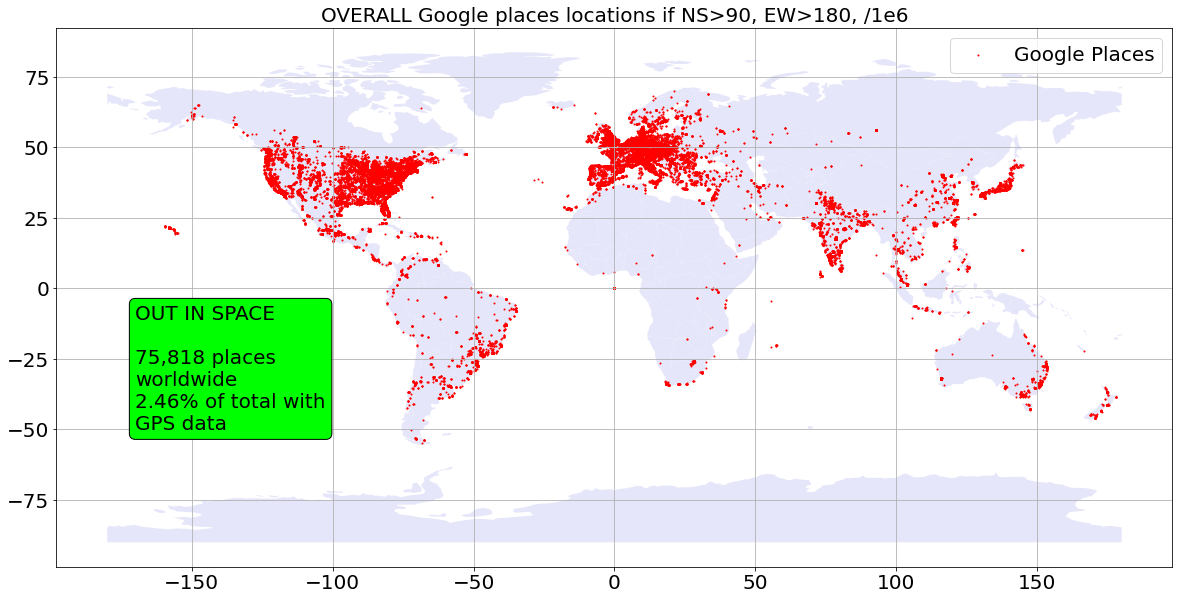

In [228]:
# plt.scatter(tmp.X_EW_longitudes/1e6
# Now the fun part
countries.plot(color="lavender", figsize=(20,15)) # color="lightgrey"
# s=1 - smallest marker
plt.scatter(df.loc[filter_BAD_gps].X_EW_longitudes,
            df.loc[filter_BAD_gps, :].Y_NS_latitudes, s=1,
            color='r', label='Google Places')

plt.title('OVERALL Google places locations if NS>90, EW>180, /1e6')
box = {'facecolor': 'lime',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
plt.text(-170, -50, 'OUT IN SPACE\n\n75,818 places\nworldwide\n2.46% of total with\nGPS data', bbox=box)
plt.legend()
plt.grid()
# bbox_inches='tight' save without extra padding
plt.savefig('img/Places_CORRECTED_gps.png',
facecolor='w', edgecolor='w',
transparent=False, bbox_inches='tight')

In [229]:
df.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,gps,Y_NS_latitudes,X_EW_longitudes
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,"[33.703804, -117.003209]",33.703804,-117.003209
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,"[38.979759, -76.547538]",38.979759,-76.547538
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,"[43.22776, 44.762726]",43.227760,44.762726
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,"[43.529494, -96.792244]",43.529494,-96.792244
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,"[-2.976256, 104.742662]",-2.976256,104.742662


In [230]:
df.shape

(3087402, 10)

In [231]:
df.loc[3087401]

name                                          Kroger Pharmacy
price                                                      $$
address            [1050 Bridgewood Dr, Fort Worth, TX 76112]
hours                                                    None
phone                                          (817) 446-6673
closed                                                   True
gPlusPlaceId                          106620038949584355328.0
gps                                   [32.765131, -97.219301]
Y_NS_latitudes                                      32.765131
X_EW_longitudes                                    -97.219301
Name: 3087401, dtype: object

In [233]:
df.drop(columns='gps', inplace=True)
df.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,1.046995e+20,33.703804,-117.003209
1,Blue Ribbon Cleaners,None,"[Parole, Annapolis, MD]",None,(410) 266-6123,False,1.030545e+20,38.979759,-76.547538
2,Portofino,None,"[ул. Тутаева, 1, Nazran, Ingushetia, Russia, 3...","[[Monday, [['9:30 am--9:00 pm']]], [Tuesday, [...",8 (963) 173-38-38,False,1.098103e+20,43.227760,44.762726
3,T C's Referee Sports Bar,$$,"[5322 W 26th St, Sioux Falls, SD 57106]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(605) 361-2208,False,1.003272e+20,43.529494,-96.792244
4,Carrefour - Palembang Square,None,"[Jl. Angkatan 45, Kompleks Palembang Square, S...","[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(0711) 359918,False,1.033685e+20,-2.976256,104.742662


In [234]:
df.loc[3087401]

name                                          Kroger Pharmacy
price                                                      $$
address            [1050 Bridgewood Dr, Fort Worth, TX 76112]
hours                                                    None
phone                                          (817) 446-6673
closed                                                   True
gPlusPlaceId                          106620038949584355328.0
Y_NS_latitudes                                      32.765131
X_EW_longitudes                                    -97.219301
Name: 3087401, dtype: object

In [239]:
whos

Variable                           Type            Data/Info
------------------------------------------------------------
BYTES_TO_MB_DIV                    float           1e-06
X_EW_deg                           float           0.021567561280927794
Y_NS_deg                           float           0.014472285807800536
box                                dict            n=3
check_gps                          function        <function check_gps at 0x7feab5631320>
counter                            int             6
countries                          GeoDataFrame           pop_est      conti<...>n\n[177 rows x 6 columns]
df                                 DataFrame                                <...>3087402 rows x 9 columns]
df_index                           Series          0                0\n1    <...>th: 3087402, dtype: int64
df_places                          DataFrame                                <...>3114353 rows x 8 columns]
filter                             Series          

In [240]:
df_sub = df.sample(n=10000, random_state=1)  # frac=0.1

In [238]:
!ls data

places.json      places_sub.json  reviews_sub.json users_sub.json
places_gps.json  reviews.json     users.json


In [241]:
df_sub.to_json('data/places_sub_gps.json')

In [244]:
help(check_gps)

Help on function check_gps in module __main__:

check_gps(gps_list, radius)
    gps_list = [NS_gps, EW_gps] in decimal degrees (Google map right-click output)
    exampe: [47.85408756055844, -122.21958066838837] - 98012 USPS
    radius - desired radius of interest im miles
    
    https://en.wikipedia.org/wiki/Earth_radius
    R_avg = 3,959 miles (3950~3963)
    
    gps column in places.gps is in the form ['NS_latitudes','EW_longitudes']
    Valid gps coordinates are NS +- 90.0, EW +- 180.0
    There are incorrect NS 75755 (2.45%), EW 75369 (2.44%) of all data
    let's do square first
    IGNORE (BUG) flip through poles EW at exactly +-90.0, and +- at exactly 180.0
    R_avg = 3959 miles, 1/4 equator-> pole 2*PI*R/4 = 90.0, or 
    PI*R/(180) = 1.0 in NS in miles
    
    Y_miles_NS_one_WAY_in_GPS_degrees = Y * 180/(PI * R_earth)
    
    R_ew = R_earth * cos(PI/180*NS_gps); R_earth at NS_gps = 0, 0 at NS_gps = +- 90.0
    
    X_miles_EW_one_WAY_in_GPS_degrees = X * 180/(PI * R_ew)

In [9]:
# create subsample using current gps, save as subsample db for the model 
# use def 
curr_gps = [47.85408756055844, -122.21958066838837]
radius = 50.0
Y_NS_deg, X_EW_deg = check_gps(curr_gps, radius)  # Google map 1.609344 km
Y_NS_deg, X_EW_deg

(0.7236142903900268, 1.0783780640463898)

In [10]:
# construct a filter based on given GPS +- box
# AND notation as & https://pythoninoffice.com/filter-a-pandas-dataframe-or-and-not/
gps_box = ((df.Y_NS_latitudes < curr_gps[0] + Y_NS_deg) & (df.Y_NS_latitudes > curr_gps[0] - Y_NS_deg)) & \
((df.X_EW_longitudes < curr_gps[1] + X_EW_deg) & (df.X_EW_longitudes > curr_gps[1] - X_EW_deg))

NameError: name 'df' is not defined

In [282]:
gps_box.sum() # 125 @ +-1 mile; 4061 @ +- 10 miles; 23958 @ +- 50 miles

23958

In [285]:
!ls data

places.json         places_sub.json     reviews.json        users.json
places_gps.json     places_sub_gps.json reviews_sub.json    users_sub.json


In [286]:
df[gps_box].to_json('data/places_sub.json')

In [292]:
df[gps_box].shape

(23958, 9)

In [290]:
gPlusPlaceId_filter = df[gps_box].gPlusPlaceId

In [289]:
!ls data

places.json         places_sub.json     reviews.json        users.json
places_gps.json     places_sub_gps.json reviews_sub.json    users_sub.json


In [291]:
type(gPlusPlaceId_filter)

pandas.core.series.Series

In [294]:
gPlusPlaceId_filter

114        1.171118e+20
188        1.077787e+20
197        1.026709e+20
462        1.159807e+20
742        1.066260e+20
               ...     
3113198    1.145442e+20
3113454    1.013767e+20
3113606    1.168646e+20
3113689    1.018366e+20
3114277    1.051600e+20
Name: gPlusPlaceId, Length: 23958, dtype: float64

In [3]:
!ls data

gPlusPlaceId_filter.json places_sub.json          reviews_sub.json
places.json              places_sub_gps.json      users.json
places_gps.json          reviews.json             users_sub.json


In [4]:
import numpy as np
import pandas as pd

In [6]:
%%time
df_places = pd.read_json('data/places_sub_gps.json')

CPU times: user 100 ms, sys: 13.5 ms, total: 114 ms
Wall time: 118 ms


In [7]:
df_places.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes
2649645,London Drugs,None,"[5255 Richmond Road SW, 300, Calgary, AB T3E 7...","[[Monday, [['9:00 am--10:00 pm']]], [Tuesday, ...",(403) 571-4932,False,1.126659e+20,51.017783,-114.160632
358766,Mikasa Park,None,"[82-14 Inaokacho, Yokosuka, Kanagawa 238-0003,...",None,046-824-6291,False,1.150497e+20,35.285658,139.673981
496811,CVS Pharmacy | Photo,None,"[14857 U.S. 19, Thomasville, GA 31792]","[[Monday, [['8:00 am--12:00 am']]], [Tuesday, ...",(229) 228-7785,False,1.026680e+20,30.852380,-83.946280
1775602,Eyes of New Mexico Family Optometry,None,"[7007 Wyoming Blvd NE, Albuquerque, NM 87109]","[[Monday, [['8:30 am--5:30 pm']]], [Tuesday, [...",(505) 828-3937,False,1.035625e+20,35.158550,-106.560744
880902,Outback Steakhouse,$$,"[5710 Oakley Blvd, Wesley Chapel, FL 33544]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(813) 973-7717,False,1.081550e+20,28.240256,-82.353610


In [1]:
z=df[gps_box].gPlusPlaceId.to_frame()
z

NameError: name 'df' is not defined

In [295]:
gPlusPlaceId_filter.to_json('data/gPlusPlaceId_filter.json')

In [ ]:
df_reviews = pd.read_json

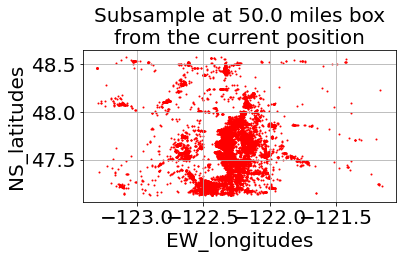

In [283]:
# plt.scatter(tmp.X_EW_longitudes/1e6
# Now the fun part
# countries.plot(color="lavender", figsize=(20,15)) # color="lightgrey"
# s=1 - smallest marker
plt.scatter(df.loc[gps_box].X_EW_longitudes,
            df.loc[gps_box].Y_NS_latitudes, s=1,
            color='r', label='Google Places')

plt.title(f'Subsample at {radius} miles box\nfrom the current position')
box = {'facecolor': 'lime',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
# plt.text(-170, -50, 'OUT IN SPACE\n\n75,818 places\nworldwide\n2.46% of total with\nGPS data', bbox=box)
# plt.legend()
plt.xlabel('EW_longitudes')
plt.ylabel('NS_latitudes')
plt.grid()

plt.tight_layout()
# bbox_inches='tight' save without extra padding
# plt.savefig('img/Places_CORRECTED_gps.png',
# facecolor='w', edgecolor='w',
# transparent=False, bbox_inches='tight')

In [18]:

print_memory_usage_of_data_frame(df_places)

Memory usage is 202.433 MB


In [2]:
# + 54.3 Mb Memory: 161.5
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls data

places.json      reviews.json     users.json
places_sub.json  reviews_sub.json users_sub.json


In [60]:
%%time
# df_users = pd.read_json('data/users_sub.json')
# df_users = pd.read_json('data/users.json')
# df_places = pd.read_json('data/places_sub.json')  # Wall time: 42.9 s (128 ms "_sub")
# df_reviews = pd.read_json('data/reviews.json')  # Wall time: 2min 10s (58.3 ms "_sub")



df_places = pd.read_json('data/places.json')
# df_reviews = pd.read_json('data/reviews_sub.json')
# Wall time: 244 ms for all three subsampled data sets

CPU times: user 39.1 s, sys: 6.72 s, total: 45.8 s
Wall time: 48.8 s


In [4]:
%%time
# tmp = pd.DataFrame(df_users.isnull().sum(), columns=['NaN counts'])
# tmp['Populated %'] = (df_users.shape[0] - tmp['NaN counts'])*100/df_users.shape[0]
# tmp = pd.DataFrame(df_places.isnull().sum(), columns=['NaN counts'])
# tmp['Populated %'] = (df_places.shape[0] - tmp['NaN counts'])*100/df_places.shape[0]
tmp = pd.DataFrame(df_reviews.isnull().sum(), columns=['NaN counts'])
tmp['Populated %'] = (df_reviews.shape[0] - tmp['NaN counts'])*100/df_reviews.shape[0]


tmp

CPU times: user 1.49 s, sys: 22.4 ms, total: 1.51 s
Wall time: 1.52 s


,NaN counts,Populated %
rating,0,100.000000
reviewerName,0,100.000000
reviewText,3533115,69.153459
categories,966148,91.564859
gPlusPlaceId,0,100.000000
unixReviewTime,851993,92.561511
reviewTime,851993,92.561511
gPlusUserId,0,100.000000


In [ ]:
df_users.info()

# FULL SET:
# tmp = pd.DataFrame(df_users.isnull().sum(), columns=['NaN counts'])
# tmp['Populated %'] = (df_users.shape[0] - tmp['NaN counts'])*100/df_users.shape[0]

# Int64Index: 10000 entries, 872833 to 35717 # FULL: 3747937 entries, 0 to 3747936
# Data columns (total 6 columns):
#  #   Column          Non-Null Count  Dtype  ==> *100/10,000 = /100
# ---  ------          --------------  -----  
#  0   userName        10000 non-null  object 
#  1   jobs            1775 non-null   object 18% FULL: 18.2%
#  2   currentPlace    1998 non-null   object 20% FULL: 20%
#  3   previousPlaces  1077 non-null   object 11% FULL: 11%
#  4   education       9964 non-null   object 99% FULL
#  5   gPlusUserId     10000 non-null  float64
# dtypes: float64(1), object(5)
# memory usage: 546.9+ KB  # FULL: 200.2+ MB (100 KB = 0.097656 MB) 0.27% of the whole dataset
# df_users.hist()

In [4]:
df_places.info()
# FULL SET:
# tmp = pd.DataFrame(df_places.isnull().sum(), columns=['NaN counts'])
# tmp['Populated %'] = (df_places.shape[0] - tmp['NaN counts'])*100/df_places.shape[0]

# Data columns (total 8 columns):
#  #   Column        Non-Null Count  Dtype  
# ---  ------        --------------  -----  
#  0   name          10000 non-null  object 
#  1   price         1315 non-null   object 
#  2   address       10000 non-null  object 
#  3   hours         4212 non-null   object 
#  4   phone         8853 non-null   object 
#  5   closed        10000 non-null  bool   
#  6   gPlusPlaceId  10000 non-null  float64
#  7   gps           9927 non-null   object 
# dtypes: bool(1), float64(1), object(6)
# memory usage: 634.8+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2476497 to 1559529
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10000 non-null  object 
 1   price         1315 non-null   object 
 2   address       10000 non-null  object 
 3   hours         4212 non-null   object 
 4   phone         8853 non-null   object 
 5   closed        10000 non-null  bool   
 6   gPlusPlaceId  10000 non-null  float64
 7   gps           9927 non-null   object 
dtypes: bool(1), float64(1), object(6)
memory usage: 634.8+ KB


In [5]:
df_reviews.info()

# Int64Index: 10000 entries, 10747508 to 9176643
# Data columns (total 8 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   rating          10000 non-null  int64  
#  1   reviewerName    10000 non-null  object 
#  2   reviewText      7071 non-null   object 
#  3   categories      9136 non-null   object 
#  4   gPlusPlaceId    10000 non-null  float64
#  5   unixReviewTime  9227 non-null   float64
#  6   reviewTime      9227 non-null   object 
#  7   gPlusUserId     10000 non-null  float64
# dtypes: float64(3), int64(1), object(4)
# memory usage: 703.1+ KB FULL: 786.5+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11453845 entries, 0 to 11453844
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   rating          int64  
 1   reviewerName    object 
 2   reviewText      object 
 3   categories      object 
 4   gPlusPlaceId    float64
 5   unixReviewTime  float64
 6   reviewTime      object 
 7   gPlusUserId     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 786.5+ MB


In [9]:
font_size = 20
plt.rc('font', size=font_size) #controls default text size
plt.rc('axes', titlesize=font_size) #fontsize of the title
plt.rc('axes', labelsize=font_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=font_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=font_size) #fontsize of the legend

Text(0.5, 1.0, 'RATINGS * ~ *****')

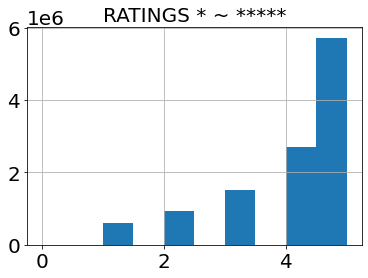

In [11]:
df_reviews.rating.hist()
plt.title('RATINGS * ~ *****')

In [ ]:
# del EW_filter, NS_filter, box, countries, filter, gpd, gps, gps_value_filter
del font_size, ser1, ser2 

In [13]:
df_reviews.categories.head()

0                                [Giải Trí - Café]
1                                [Turkish Cuisine]
2    [Fishing, Pond Fish Supplier, Seafood Market]
3                                         [Museum]
4                                         [Police]
Name: categories, dtype: object